# Feasability of Solar in Low/Moderate Income Communities

**Data Source**

NREL Solar Energy Evolution and Diffusuion Studies Project  
Report: Sigrin and Mooney 2018


**Data Structure**

The overall data is comprised of 11 data sets, including the Sigrin and Mooney (2018) estimations of
Rooftop Technical Potential of low/moderate income communities. The other data sets are demographic factors.

*Observations*: 72760 low/moderate income Census Tracts in all 50 US states  
*Features*: 220 columns


**Research Question**


1. For low income communities in Colorado, can easily accessible demographic factors be used to predict rooftop solar potentail?  
2. Can these demographic factors predict whether or not rooftop solar is *worth it*, or where predicted solar production exceeds current energy consumption?

<br/><br/>

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Data**

In [2]:
solar_Whole = pd.read_csv("Solar_Project.csv")

C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Filter data**  
to only Colorado and create columns for energy production/consumption.

In [3]:
solar = solar_Whole[solar_Whole['state_abbr']=="CO"].reset_index()
solar['PROD_total_annual_MWh']=solar.filter(like='_mwh').sum(axis=1)
solar['TOTAL_Units']=solar.iloc[:, 11:31].sum(axis=1)
solar['CONS_total_annual_MWh']=solar['TOTAL_Units']*(solar['avg_monthly_consumption_kwh']*(12/1000))
solar['Diff']=solar['PROD_total_annual_MWh']-solar['CONS_total_annual_MWh']

**Create Column for whether or not solar is 'Worth it'**  
With 3 possible values for the difference between production and consumption:
0. no (Production < Consumption)
1. possibly (Production < Consumption, but less than 1 standard deviation)
2. absoultely (Production > consumption)

In [4]:
solar['Diff'].describe()

count     1249.000000
mean         7.232935
std       4317.301686
min     -22013.880132
25%      -2376.608839
50%        197.155338
75%       2683.741667
max      14973.095100
Name: Diff, dtype: float64

In [5]:
def cases(difference):
    if difference > 0:
        return 'absolutely'
    elif difference > -4415:
        return 'possibly'
    else:
        return 'no'

solar['Worthit']=solar['Diff'].apply(cases)

In [6]:
def cases_num(difference):
    if difference > 0:
        return '2'
    elif difference > -7734:
        return '1'
    else:
        return '0'

solar['Worthit_value']=solar['Diff'].apply(cases_num)

<br/><br/>

### Cleaning Data

**Find missing data**  
Dropping columns that are entirely empty  
Dropping rows with any missing data (less than 200)

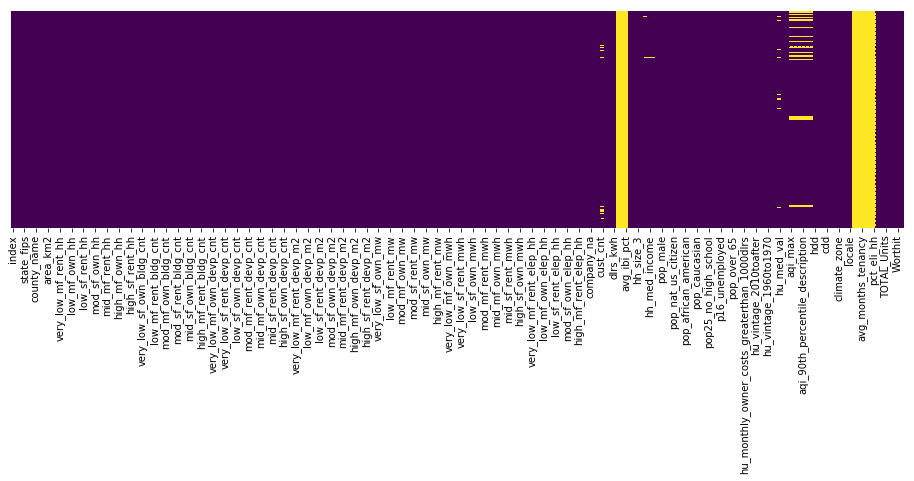

In [7]:
plt.figure(figsize=(16,4))
sns.heatmap(solar.isnull(),yticklabels=False,cbar=False,cmap='viridis')

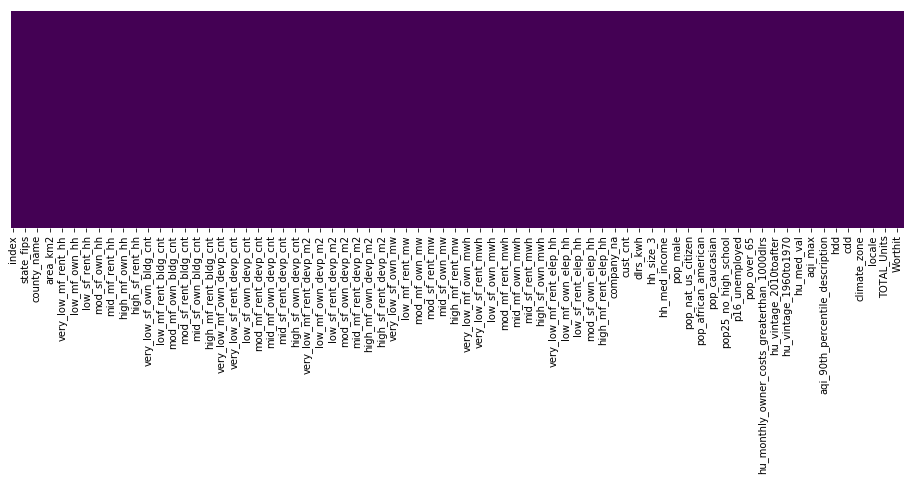

In [8]:
solar.dropna(axis=1,how='all',inplace=True)
solar.dropna(inplace=True)

plt.figure(figsize=(16,4))
sns.heatmap(solar.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<br/><br/>

**Dimension Reduction**  
First, removing all features that were part of the solar production estimation;  
I am only interested in the Total Annual Production MWh

In [9]:
solar.drop(['very_low_mf_own_hh',
            'very_low_mf_rent_hh', 'very_low_sf_own_hh', 'very_low_sf_rent_hh',
       'low_mf_own_hh', 'low_mf_rent_hh', 'low_sf_own_hh',
       'low_sf_rent_hh', 'mod_mf_own_hh', 'mod_mf_rent_hh',
       'mod_sf_own_hh', 'mod_sf_rent_hh', 'mid_mf_own_hh',
       'mid_mf_rent_hh', 'mid_sf_own_hh', 'mid_sf_rent_hh',
       'high_mf_own_hh', 'high_mf_rent_hh', 'high_sf_own_hh',
       'high_sf_rent_hh', 'very_low_mf_own_bldg_cnt',
       'very_low_mf_rent_bldg_cnt', 'very_low_sf_own_bldg_cnt',
       'very_low_sf_rent_bldg_cnt', 'low_mf_own_bldg_cnt',
       'low_mf_rent_bldg_cnt', 'low_sf_own_bldg_cnt',
       'low_sf_rent_bldg_cnt', 'mod_mf_own_bldg_cnt',
       'mod_mf_rent_bldg_cnt', 'mod_sf_own_bldg_cnt',
       'mod_sf_rent_bldg_cnt', 'mid_mf_own_bldg_cnt',
       'mid_mf_rent_bldg_cnt', 'mid_sf_own_bldg_cnt',
       'mid_sf_rent_bldg_cnt', 'high_mf_own_bldg_cnt',
       'high_mf_rent_bldg_cnt', 'high_sf_own_bldg_cnt',
       'high_sf_rent_bldg_cnt', 'very_low_mf_own_devp_cnt',
       'very_low_mf_rent_devp_cnt', 'very_low_sf_own_devp_cnt',
       'very_low_sf_rent_devp_cnt', 'low_mf_own_devp_cnt',
       'low_mf_rent_devp_cnt', 'low_sf_own_devp_cnt',
       'low_sf_rent_devp_cnt', 'mod_mf_own_devp_cnt',
       'mod_mf_rent_devp_cnt', 'mod_sf_own_devp_cnt',
       'mod_sf_rent_devp_cnt', 'mid_mf_own_devp_cnt',
       'mid_mf_rent_devp_cnt', 'mid_sf_own_devp_cnt',
       'mid_sf_rent_devp_cnt', 'high_mf_own_devp_cnt',
       'high_mf_rent_devp_cnt', 'high_sf_own_devp_cnt',
       'high_sf_rent_devp_cnt', 'very_low_mf_own_devp_m2',
       'very_low_mf_rent_devp_m2', 'very_low_sf_own_devp_m2',
       'very_low_sf_rent_devp_m2', 'low_mf_own_devp_m2',
       'low_mf_rent_devp_m2', 'low_sf_own_devp_m2', 'low_sf_rent_devp_m2',
       'mod_mf_own_devp_m2', 'mod_mf_rent_devp_m2', 'mod_sf_own_devp_m2',
       'mod_sf_rent_devp_m2', 'mid_mf_own_devp_m2', 'mid_mf_rent_devp_m2',
       'mid_sf_own_devp_m2', 'mid_sf_rent_devp_m2', 'high_mf_own_devp_m2',
       'high_mf_rent_devp_m2', 'high_sf_own_devp_m2',
       'high_sf_rent_devp_m2', 'very_low_mf_own_mw',
       'very_low_mf_rent_mw', 'very_low_sf_own_mw', 'very_low_sf_rent_mw',
       'low_mf_own_mw', 'low_mf_rent_mw', 'low_sf_own_mw',
       'low_sf_rent_mw', 'mod_mf_own_mw', 'mod_mf_rent_mw',
       'mod_sf_own_mw', 'mod_sf_rent_mw', 'mid_mf_own_mw',
       'mid_mf_rent_mw', 'mid_sf_own_mw', 'mid_sf_rent_mw',
       'high_mf_own_mw', 'high_mf_rent_mw', 'high_sf_own_mw',
       'high_sf_rent_mw', 'very_low_mf_own_mwh', 'very_low_mf_rent_mwh',
       'very_low_sf_own_mwh', 'very_low_sf_rent_mwh', 'low_mf_own_mwh',
       'low_mf_rent_mwh', 'low_sf_own_mwh', 'low_sf_rent_mwh',
       'mod_mf_own_mwh', 'mod_mf_rent_mwh', 'mod_sf_own_mwh',
       'mod_sf_rent_mwh', 'mid_mf_own_mwh', 'mid_mf_rent_mwh',
       'mid_sf_own_mwh', 'mid_sf_rent_mwh', 'high_mf_own_mwh',
       'high_mf_rent_mwh', 'high_sf_own_mwh', 'high_sf_rent_mwh',
       'very_low_mf_own_elep_hh', 'very_low_mf_rent_elep_hh',
       'very_low_sf_own_elep_hh', 'very_low_sf_rent_elep_hh',
       'low_mf_own_elep_hh', 'low_mf_rent_elep_hh', 'low_sf_own_elep_hh',
       'low_sf_rent_elep_hh', 'mod_mf_own_elep_hh', 'mod_mf_rent_elep_hh',
       'mod_sf_own_elep_hh', 'mod_sf_rent_elep_hh', 'high_mf_own_elep_hh',
       'high_mf_rent_elep_hh', 'high_sf_own_elep_hh',
       'high_sf_rent_elep_hh'],axis=1,inplace=True)

solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 1 to 1248
Data columns (total 82 columns):
index                                          1030 non-null int64
geoid                                          1030 non-null int64
gisjoin                                        1030 non-null object
state_fips                                     1030 non-null int64
state_name                                     1030 non-null object
state_abbr                                     1030 non-null object
county_name                                    1030 non-null object
county_fips                                    1030 non-null int64
tract_fips                                     1030 non-null int64
area_km2                                       1030 non-null float64
centroid_x                                     1030 non-null float64
company_na                                     1030 non-null object
company_ty                                     1030 non-null object
eia_id      

**Finding correlated features**  
There are a lot of population variables, so I want to know which are highly correlated so I can use fewer in the analysis.

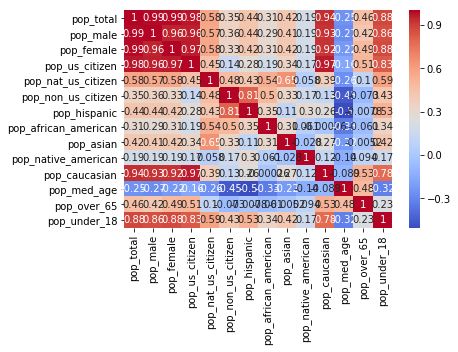

In [10]:
popcorr=solar.filter(like='pop_',axis=1).corr()
sns.heatmap(popcorr, annot=True,cmap='coolwarm')

**Remove highly-correlated features**  
Along with some highly correlated population features, I remove descriptor columns and non-number columns to run a correlation function

In [11]:
solar_redux = solar.drop(['index', 'geoid', 'gisjoin', 'state_fips', 'state_name','state_abbr',
                          'county_name', 'county_fips', 'tract_fips','centroid_x', 'company_na', 
                          'company_ty', 'eia_id','cust_cnt', 'avg_monthly_consumption_kwh',
                          'avg_monthly_bill_dlrs','dlrs_kwh','pop_male','pop_female',
                          'pop_us_citizen','pop_caucasian','aqi_max_description',
                          'aqi_90th_percentile_description','aqi_median_description',
                          'climate_zone_description', 'moisture_regime', 'locale','lihtc_qualified',
                          'TOTAL_Units','CONS_total_annual_MWh', 'Diff', 'Worthit',
                          'Worthit_value'],axis=1)

In [12]:
def corr_df(x, corr_val):
    '''
    This function drops features that are strongly correlated to other features,
            reducing data complexity.
    
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

Removing correlated features that are 90% correlated or higher

In [13]:
solar_corr=corr_df(solar_redux,0.9)

pop25_no_high_school | pop_hispanic | 0.91
pop_under_18 | hh_size_4 | 0.96
hu_mortgage | hu_monthly_owner_costs_greaterthan_1000dlrs | 0.98
hu_mortgage | hu_own | 1.0
cdd | hdd | -0.92
cdd_std | hdd | -0.93
cdd_ci | hdd | -0.93


In [14]:
solar_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 1 to 1248
Data columns (total 43 columns):
area_km2                                       1030 non-null float64
hh_size_1                                      1030 non-null int64
hh_size_2                                      1030 non-null int64
hh_size_3                                      1030 non-null int64
hh_size_4                                      1030 non-null int64
fam_med_income                                 1030 non-null float64
hh_med_income                                  1030 non-null float64
hh_gini_index                                  1030 non-null float64
pop_total                                      1030 non-null int64
pop_nat_us_citizen                             1030 non-null int64
pop_non_us_citizen                             1030 non-null int64
pop_hispanic                                   1030 non-null int64
pop_african_american                           1030 non-null int64
pop_asian     

**Ready for Analysis**  
The data set now contains 43 columns (42 features and 1 response for now: PROD_total_annual_MWh)

<br/><br/>

### Exploratory Data Analysis

Bring the response variables back

In [15]:
solar_feasible = pd.concat([solar_corr,solar['Worthit'],solar['Worthit_value']],axis=1)

Text(0, 0.5, 'Total Annual Solar Production (KWh)')

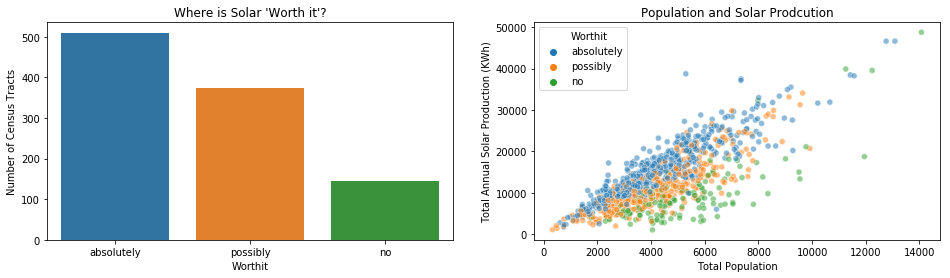

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))

sns.countplot(solar_feasible['Worthit'],ax=axs[0])
axs[0].set_title("Where is Solar 'Worth it'?")
axs[0].set_ylabel("Number of Census Tracts")

sns.scatterplot(data=solar_feasible,x='pop_total',y='PROD_total_annual_MWh',hue='Worthit',alpha=0.5,ax=axs[1])
axs[1].set_title("Population and Solar Prodcution")
axs[1].set_xlabel("Total Population")
axs[1].set_ylabel("Total Annual Solar Production (KWh)")

There are many more tracts where solar is possibly or absolutely worth it,  
but keep in mind that 'possibly' still means consumption exceeds predicted production.


It makes sense that the potential production increases with total population  
(more population = more structures with roofs for solar). Furthermore, solar is more often 'worth it' at higher production levels.

<br></br>

Text(0, 0.5, 'Number of Renting Households')

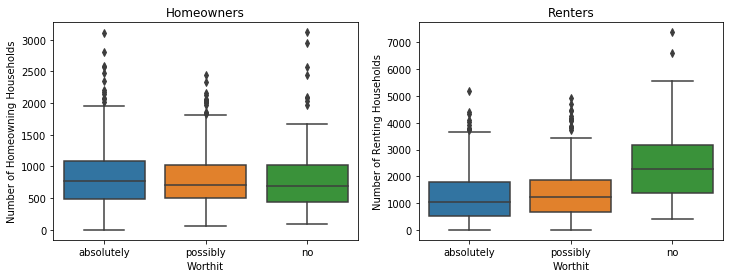

In [17]:
fig2, axs2 = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=solar_feasible,x='Worthit',y='hu_own',ax=axs2[0])
axs2[0].set_title("Homeowners")
axs2[0].set_ylabel("Number of Homeowning Households")

sns.boxplot(data=solar_feasible,x='Worthit',y='hu_rent',ax=axs2[1])
axs2[1].set_title("Renters")
axs2[1].set_ylabel("Number of Renting Households")

While it makes sense that there are more instances of renting than home ownership in lower income communities,  
it is intersting that when the number of renting households is highest, solar panels are not 'worth it'.

<br></br>

### Analysis and Machine Learning

**Can demographic factors predict solar production?**

Using a linear regression to answer this question.

In [18]:
from sklearn.model_selection import train_test_split

X=solar_corr.drop('PROD_total_annual_MWh',axis=1)
y=solar_corr['PROD_total_annual_MWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0, 0.5, 'Predicted')

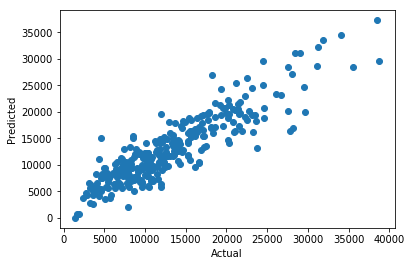

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

It looks like the model does a good job of predicting solar output.

Now, let's evaluate the model...

<br></br>

In [20]:
import statsmodels.api as sm
from scipy import stats


X_train1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train1)

results=model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     PROD_total_annual_MWh   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     94.43
Date:                   Fri, 23 Aug 2019   Prob (F-statistic):          1.83e-248
Time:                           11:19:39   Log-Likelihood:                -6743.3
No. Observations:                    721   AIC:                         1.357e+04
Df Residuals:                        680   BIC:                         1.376e+04
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\Andrew\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The model R-squared looks pretty great (0.82).


There is a risk this model is over-fitted, especially since we know popultion gives a good idea of production,  
but the fit is strong, and stakeholders can see how the factors contribute.

<br></br>

**Classification**

Now, I'm bringing back the dataframe with the outcome classes in order to see if the demographic factors  
can predict whether or not installing solar makes sense.

**First up is a Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

X=solar_feasible.drop(['PROD_total_annual_MWh','Worthit','Worthit_value'],axis=1)
y=solar_feasible['Worthit_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[  7  11   1]
 [  4  97  40]
 [  1  39 109]]
              precision    recall  f1-score   support

           0       0.58      0.37      0.45        19
           1       0.66      0.69      0.67       141
           2       0.73      0.73      0.73       149

   micro avg       0.69      0.69      0.69       309
   macro avg       0.66      0.60      0.62       309
weighted avg       0.69      0.69      0.69       309



Judging by the confusion matrix and classification report,  
the model does an OK job, but isn't great at predicting the 'no' class.

I think I can do better...

<br></br>

**Next is Random Forest Classification**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200) 
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.76      0.74      0.75       141
           2       0.76      0.85      0.80       149

   micro avg       0.77      0.77      0.77       309
   macro avg       0.84      0.64      0.68       309
weighted avg       0.78      0.77      0.76       309



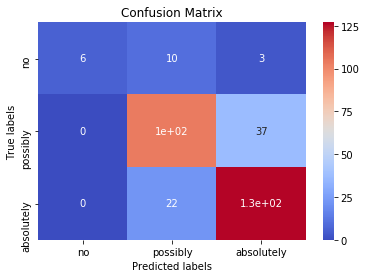

In [23]:
cm=confusion_matrix(y_test,rfc_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='coolwarm'); #annot=True to annotate cells

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['no', 'possibly','absolutely']); ax.yaxis.set_ticklabels(['no', 'possibly','absolutely'])

print(classification_report(y_test,rfc_pred))

Overall, this model does a little better, with a weighted average recall of 77% vs. 69%

<br></br>

### Conclusions

**Overall, demographic factors do a good job of predicting how much solar energy could be produced in low income communities.**

**They can also predict where solar would be the most feasible: where solar production exceeds energy consumption.**


**Stakeholders and/or companies could use this information in several ways:**  
1. Communities in the 'possibly' or 'no' range for solar feasibility could benefit from larger-scale community solar projects, where roof area currently does not suffice.
2. Policymakers and organizations could direct funding and development for solar to the communities where it will be most effective.
3. With the upcoming census, city officials could use the new census data and these models to better guide their solar investments.